### DBSCAN on artificial data

In this practice we will do a **DBSCAN clustering** using the **make_blobs()** function to generate random samples.


In [2]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

### Data generation

The function below will generate the data points and requires its input.

In [4]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

Use <b>createDataPoints</b> with the <b>3 inputs</b> and store the output into variables <b>X</b> and <b>y</b>.

In [7]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)
print (X[:5])
print (y[:5])

[[-1.14623253  0.69617478]
 [ 0.93754335  0.2913272 ]
 [ 1.16300236  0.39752679]
 [ 0.04766633 -1.68073087]
 [-0.98864506  1.03634386]]
[2 0 0 1 2]


### Modeling

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.
The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points\
**Epsilon** determine a specified radius that if includes enough number of points within, we call it dense area\
**minimumSamples** determine the minimum number of data points we want in a neighborhood to define a cluster.

In [48]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
print (labels)
print (db.core_sample_indices_)

[0 1 1 ... 0 0 2]
[   0    1    2 ... 1497 1498 1499]


### Distinguish outliers

Let's Replace all elements with *'True'* in *core_samples_mask* that are in the cluster, *'False'* if the points are *outliers*.


In [49]:
# Firts, create an array of booleans using the labels from db.

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask


array([ True,  True,  True, ...,  True,  True,  True])

In [50]:
# Number of clusters in labels, with/without ignoring noise if present.

unique_lables = set(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
print ("labels with outlier:", unique_labels)
print ("lables without outlier:", n_clusters_)

labels with outlier: {0, 1, 2, -1}
lables without outlier: 3


### Data visualization


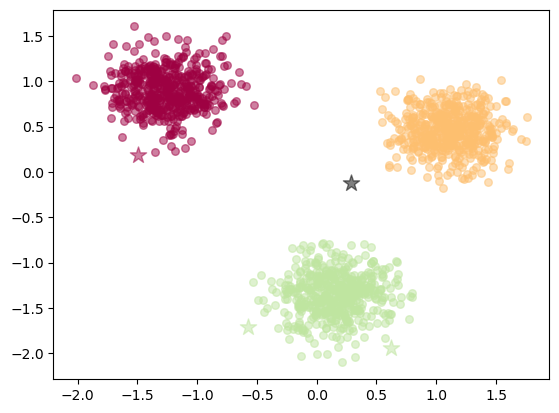

In [59]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=30, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=150, c=[col], marker=u'*', alpha=0.5)